# Introduction

Advertising has been, and likely always will be, an integral part of our capitalist society. Where there is demand, there is an opportunity to earn. As such, optimizing advertisements is essential for any company looking to increase revenue. This optimization can come from changing colors, wording, or even where you see an ad. Anyone familiar with internet browsing will know how often ads are shown, all with the goal of getting you to click to learn more. Maybe clicking takes you to an amazon page or to a front page for the brand, either way, the click is a powerful step in advertising. This analysis seeks to answer the question: "What strategy best ensures a viewer clicks on an ad?" To answer this question, we will examine the the ads position and the details around when it's shown, including time, browsing history, and what device the ad is being viewed on.

## The Data

Our data comes from the "Ad Click Prediction Dataset" on kaggle, collected by Ciobanu Marius. The data consists of 10,000 entries across 9 features. These features include:
1. <b>id</b> - the id given to the viewer
2. <b>full_name</b> - the name of the viewer (formatted as 'UserX' for anonymity)
3. <b>age</b> - the age of the viewer
4. <b>gender</b> - the gender of the viewer
5. <b>device_type</b> - the type of device used
6. <b>ad_position</b> - the position of the ad on the page
7. <b>browsing_history</b> - what type of browsing was happening before the ad was shown
8. <b>time_of_day</b> - the time the ad was seen
9. <b>click</b> - the binary target value for whether the ad was clicked<br>

Of the variables, <b>id</b> and <b>full_name</b> are identifying variables and therefore aren't meant to be used as predictors. <b>age</b> is the only numerical variable, with the rest being categorical, aside from our target variable <b>click</b>. We can observe below that the dataset appears to be a little unbalanced, with our target variable returning '1' 6,500 times and '0' only 3,500 times.

In [1]:
import pandas as pd

In [38]:
# import dataset into a Pandas dataframe
df = pd.read_csv('ad_click_dataset.csv')

#View dataset
df.head()

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0


In [3]:
#dataset dimensions
df.shape

(10000, 9)

In [4]:
#dataset features and datatypes
df.dtypes

id                    int64
full_name            object
age                 float64
gender               object
device_type          object
ad_position          object
browsing_history     object
time_of_day          object
click                 int64
dtype: object

In [56]:
df['click'].value_counts()

click
1    6500
0    3500
Name: count, dtype: int64

## Preprocessing

Our preprocessing begins by examining the number of null values in each variable. We can see below that a large number of values are left null, meaning we cannot just remove all entries with invalid data. We will keep this in mind as we build out our model.

In [7]:
#check for missing values
df.isnull().sum()

id                     0
full_name              0
age                 4766
gender              4693
device_type         2000
ad_position         2000
browsing_history    4782
time_of_day         2000
click                  0
dtype: int64

Next, we check for any duplicate entries. Here we find that 2,853 entries are duplicates. At first this could be explained by the limited amount of values in each variable. This can be disproved, however, after considering the <b>id</b> column. Therefore, these entries must be removed. Observing the new balance of data, we see that all duplicated entries were returning a '1' for <b>click</b>. On top of balancing our dataset, this also removes some of the null value entries as well, meaning less of our data is missing.

In [20]:
df.duplicated().sum()

2853

In [69]:
df_clean = df.drop_duplicates()
df_forGraphs = df_clean
df_clean['click'].value_counts()

click
1    3647
0    3500
Name: count, dtype: int64

In [65]:
df_clean.isnull().sum()

id                     0
full_name              0
age                 3476
gender              3400
device_type         1728
ad_position         1743
browsing_history    3480
time_of_day         1712
click                  0
dtype: int64

Now we begin the process of converting categorical variables into binary ones. <b>gender</b>, <b>device_type</b>, <b>ad_position</b>, <b>browsing_history</b>, and <b>time_of_day</b> can all be broken down using dummy encoding. We simply create coloumns of each possible answer in the categorical variables and remove the original variables when we are done. This reshaping of the dataset turns our 9 original variables into 22 total features, of which 18 are the new binary variables. Splitting up the variables in this way will allow us to see the differences in each value.

In [66]:
# Gets every unique value for 'gender', and creates boolean columns for each.
gender_dummies = pd.get_dummies(df_clean['gender'], dtype='int64')
df_clean = pd.concat([df_clean, gender_dummies], axis=1)
df_clean = df_clean.drop(['gender'], axis=1)

# Gets every unique value for 'device_type', and creates boolean columns for each.
device_dummies = pd.get_dummies(df_clean['device_type'], dtype='int64')
df_clean = pd.concat([df_clean, device_dummies], axis=1)
df_clean = df_clean.drop(['device_type'], axis=1)

# Gets every unique value for 'ad_position', and creates boolean columns for each.
ad_dummies = pd.get_dummies(df_clean['ad_position'], dtype='int64')
df_clean = pd.concat([df_clean, ad_dummies], axis=1)
df_clean = df_clean.drop(['ad_position'], axis=1)

#Gets every unique value for 'browsing_history', and creates boolean columns for each.
history_dummies = pd.get_dummies(df_clean['browsing_history'], dtype='int64')
df_clean = pd.concat([df_clean, history_dummies], axis=1)
df_clean = df_clean.drop(['browsing_history'], axis=1)

#Gets every unique value for 'time_of_day', and creates boolean columns for each.
time_dummies = pd.get_dummies(df_clean['time_of_day'], dtype='int64')
df_clean = pd.concat([df_clean, time_dummies], axis=1)
df_clean = df_clean.drop(['time_of_day'], axis=1)


# View dataset
df_clean

,id,full_name,age,click,Female,Male,Non-Binary,Desktop,Mobile,Tablet,...,Top,Education,Entertainment,News,Shopping,Social Media,Afternoon,Evening,Morning,Night
0,670,User670,22.0,1,0,0,0,1,0,0,...,1,0,0,0,1,0,1,0,0,0
1,3044,User3044,NaN,1,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,5912,User5912,41.0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,5418,User5418,34.0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,9452,User9452,39.0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8510,User8510,NaN,0,0,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0
9996,7843,User7843,NaN,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
9997,3914,User3914,NaN,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
9998,7924,User7924,NaN,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


And this concludes our data cleaning and preprocessing, which means its time to move on to...

## Data Visualization

Below is a series of five double bar plots. Each one covers one of the five categorical variables: <b>gender</b>, <b>device_type</b>, <b>ad_position</b>, <b>browsing_history</b>, and <b>time_of_day</b>. Here they count they number of entries that each category has for both clicking and not clicking the ad. Surprisingly, there is no immediate connection that jumps out between any of these values and the outcome of <b>click</b>. 

In [67]:
import matplotlib.pyplot as plt
import numpy as np

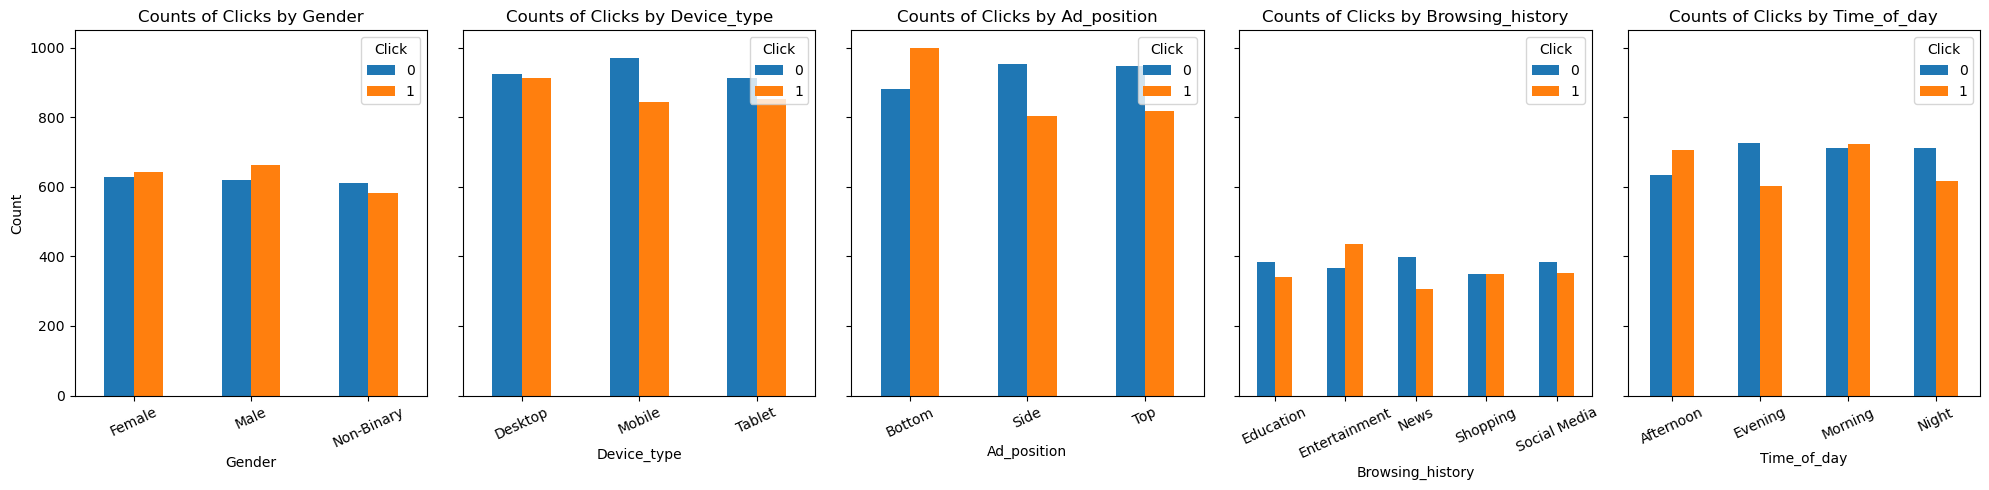

In [78]:
main_variables = ['gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day']
fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)


for ax, variable in zip(axes, main_variables):
    # Group by the current variable and 'click', then count the occurrences
    variable_click_counts = df_forGraphs.groupby([variable, 'click']).size().unstack(fill_value=0)
    
    # Plot the bar chart for the current variable
    variable_click_counts.plot(kind='bar', ax=ax, stacked=False)
    ax.set_title(f'Counts of Clicks by {variable.capitalize()}')
    ax.set_xlabel(variable.capitalize())
    ax.set_ylabel('Count' if ax == axes[0] else '')  # Show y-label only on the first plot
    ax.legend(title='Click')
    ax.tick_params(axis='x', rotation=25)  # Rotate x-axis labels

plt.tight_layout()
plt.show()

## Modeling

NOTE: No models have been developed yet, though I believe I will be using a Naive Bayes model. It should work well with my large number of features and the many categorical variables in play. I am also considering using a Logistic Regression model, as I have some previous experience with it, or a Random forest model, though I do not have much experience or knowledge of this type of model. I plan to create multiple models to determine which one functions the best for the type of data I have. My main concern with modeling is the distinct lack of effect any of the variables seem to have on the target. Each variable waivers around roughly 50/50, meaning any model I create may be best just flipping a coin. If this ends up being the case, at best I can report that the variables given by the dataset are not good predictors. Sometimes a question like "Whats optimal?" has to be answered with "I don't know".